In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [4]:
bncc_raw = pd.read_csv('C:/Users/Danilo/Desktop/Documentos Acadêmicos/TERA/TERAprojetos/Projeto final/BNCC/bncc_db.csv', encoding = 'utf8')
bncc_db = bncc_raw.copy()
bncc_db.head()

,id,question,bulletType,name,slug,name.1,slug.1,name.2,code,description
0,2759872,"<p style=""text-align:left;"">É muito comum no d...",2,Outros,outros,Ciências,ciencias,Fundamental II,EF06LP01,Reconhecer a impossibilidade de uma neutralida...
1,3130254,<p>dadasd</p>,2,Arquitetura,arquitetura,Arte,arte,Fundamental II,EF06LP01,Reconhecer a impossibilidade de uma neutralida...
2,3134220,<p>Quest&atilde;o 01</p><p><br></p><p>Observe ...,4,Morfologia: Verbo,morfologia-verbo,Língua Portuguesa,lingua-portuguesa,Fundamental II,EF06LP01,Reconhecer a impossibilidade de uma neutralida...
3,3134221,"<p>Quando eu era garoto, acreditava em bruxas,...",4,Morfologia: Verbo,morfologia-verbo,Língua Portuguesa,lingua-portuguesa,Fundamental II,EF06LP01,Reconhecer a impossibilidade de uma neutralida...
4,3134222,<p>De cima para baixo</p><p>Naquele dia o <str...,4,Morfologia: Verbo,morfologia-verbo,Língua Portuguesa,lingua-portuguesa,Fundamental II,EF06LP01,Reconhecer a impossibilidade de uma neutralida...


## Explorando os dados

In [5]:
bncc_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8908 entries, 0 to 8907
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           8908 non-null   int64 
 1   question     8908 non-null   object
 2   bulletType   8908 non-null   int64 
 3   name         8908 non-null   object
 4   slug         8908 non-null   object
 5   name.1       8908 non-null   object
 6   slug.1       8908 non-null   object
 7   name.2       8908 non-null   object
 8   code         8908 non-null   object
 9   description  8908 non-null   object
dtypes: int64(2), object(8)
memory usage: 696.1+ KB


In [38]:
name1 = bncc_db['name.1'].nunique()
d = ('São um total de %d Áreas do Conhecimento' % (name1))

display(
    d,
    bncc_db.iloc[:, 5].agg(['value_counts']).head()
)

'São um total de 20 Áreas do Conhecimento'

,value_counts
Língua Portuguesa,1459
Matemática,1449
Geografia,1375
Ciências,1242
História,1203


In [34]:
### Coluna code

bncc_db.iloc[:, 8].unique()

array(['EF06LP01', 'EF06LP02', 'EF06LP03', 'EF06LP04', 'EF06LP05',
       'EF06LP06', 'EF06LP07', 'EF06LP08', 'EF06LP09', 'EF06LP10',
       'EF06LP11', 'EF06LP12', 'EF67LP01', 'EF67LP02', 'EF67LP03',
       'EF67LP04', 'EF67LP05', 'EF67LP06', 'EF67LP07', 'EF67LP08',
       'EF67LP09', 'EF67LP10', 'EF67LP11', 'EF67LP12', 'EF67LP13',
       'EF67LP14', 'EF67LP15', 'EF67LP16', 'EF67LP17', 'EF67LP19',
       'EF67LP20', 'EF67LP21', 'EF67LP23', 'EF67LP24', 'EF67LP25',
       'EF67LP26', 'EF67LP27', 'EF67LP28', 'EF67LP29', 'EF67LP30',
       'EF67LP32', 'EF67LP33', 'EF67LP35', 'EF67LP36', 'EF67LP37',
       'EF67LP38', 'EF69LP01', 'EF69LP02', 'EF69LP03', 'EF69LP04',
       'EF69LP05', 'EF69LP06', 'EF69LP07', 'EF69LP08', 'EF69LP09',
       'EF69LP11', 'EF69LP12', 'EF69LP13', 'EF69LP14', 'EF69LP15',
       'EF69LP16', 'EF69LP17', 'EF69LP18', 'EF69LP20', 'EF69LP21',
       'EF69LP22', 'EF69LP23', 'EF69LP24', 'EF69LP25', 'EF69LP27',
       'EF69LP28', 'EF69LP29', 'EF69LP30', 'EF69LP31', 'EF69LP

In [6]:
code = bncc_db['code'].nunique()
d = ('São um total de %d códigos da BNCC presentes no dataset' % (code))

display(
    d,
    bncc_db.iloc[:, 8].agg(['value_counts']).head()
)

'São um total de 799 códigos da BNCC presentes no dataset'

,value_counts
EF69LP01,712
EF06LP01,637
EF67LP01,435
EF69LP02,222
EF02ER01,138


In [7]:
description = bncc_db['description'].nunique()
d = ('São um total de %d descrições' % (description))

display(
    d,
    bncc_db['description'].agg(['value_counts']).head()
)

'São um total de 861 descrições'

,value_counts
"Diferenciar liberdade de expressão de discursos de ódio, posicionando-se contrariamente a esse tipo de discurso e vislumbrando possibilidades de denúncia quando for o caso.",712
"Reconhecer a impossibilidade de uma neutralidade absoluta no relato de fatos e identificar diferentes graus de parcialidade/ imparcialidade dados pelo recorte feito e pelos efeitos de sentido advindos de escolhas feitas pelo autor, de forma a poder desenvolver uma atitude crítica frente aos textos jornalísticos e tornar-se consciente das escolhas feitas enquanto produtor de textos.",637
Analisar a estrutura e funcionamento dos hiperlinks em textos noticiosos publicados na Web e vislumbrar possibilidades de uma escrita hipertextual.,435
"Analisar e comparar peças publicitárias variadas (cartazes, folhetos, outdoor, anúncios e propagandas em diferentes mídias, spots, jingle, vídeos etc.), de forma a perceber a articulação entre elas em campanhas, as especificidades das várias semioses e mídias, a adequação dessas peças ao público-alvo, aos objetivos do anunciante e/ou da campanha e à construção composicional e estilo dos gêneros em questão, como forma de ampliar suas possibilidades de compreensão (e produção) de textos pertencentes a esses gêneros.",222
Reconhecer os diferentes espaços de convivência.,138


In [8]:
question = bncc_db['question'].nunique()
d = ('São um total de %d questões' % (question))

display(
    d,
    bncc_db['question'].agg(['value_counts']).head()
)

'São um total de 7549 questões'

,value_counts
"<p>(CMDPII) Read the dialogue and answer the question.</p> <p style=""text-align:center;""><img src=""https://s3.amazonaws.com/studos-plus/questions/1618868167757-1618868167757.png"" style=""width:459px;"" alt=""Studos""></p> <p><strong>Henri</strong>: Hello, Mary. How are you?</p> <p><strong>Mary</strong>: Fine, thanks. And you?</p> <p><strong>Henri</strong>: Great! Mary, this is Helen.</p> <p><strong>Mary</strong>: Hi, Helen nice to meet you.</p> <p><strong>Helen</strong>: Nice to meet you, too.</p> <p><strong>Mary</strong>: Well, I have to go. Bye-bye.</p> <p style=""text-align:right;""><sup>StandFor-2014.Team up. Texto adaptado. https://thumbs.dreamstime.com/z/three-friends-talking-taking-conversation-street-happy-sunny-day-buildings. Acesso em 02 de março de 2018.</sup></p> <p><strong><sup>Vocabulário:</sup></strong></p> <p><sup>1. Great: Ótimo; </sup><sup>2. Have to go: Tenho que ir; </sup><sup>3. Meets: Conhecer, encontrar.</sup></p> <p><sup>Disponível em Oxford, dicionário escolar.</sup></p> <p> After reading the dialogue choose the only <strong>CORRECT OPTION.</strong></p>",12
<p>01-Marque o singular da palavra cartas .</p>,12
<p>02- singular da palavra borboletas .</p>,11
<p>O professor de Educa&ccedil;&atilde;o F&iacute;sica organizou no p&aacute;tio da escola 2 fileiras com 34 alunos em cada uma. Quantos alunos est&atilde;o no p&aacute;tio da escola?</p>,10
<p>O magnetismo e a Eletricidade em nosso e s&atilde;o &aacute;reas da ci&ecirc;ncia que estudam os fen&ocirc;menos magn&eacute;ticos e el&eacute;tricos que pode estar presentes em nosso dia a dia. A atra&ccedil;&atilde;o entre o metal e o &iacute;m&atilde; &eacute; um bom exemplo de fen&ocirc;meno magn&eacute;tico. J&aacute; o funcionamento de uma l&acirc;mpada acessa &eacute; um bom condutor de eletricidade. Em rela&ccedil;&atilde;o aos &iacute;m&atilde;s marque a alternativa correta.</p>,10


## Limpando as questões

In [12]:
### Resolvendo problema de codificação de caracteres presentes nas Questões

import html

data_quest = bncc_db['question'].astype('str').apply(html.unescape)

### Resolvendo problema de tags html

import regex as reg
CLEANR = reg.compile('<.*?>') 


def cleanhtml(raw_html):
  cleantext = reg.sub(CLEANR, '', raw_html)
  return cleantext

text = data_quest.map(lambda x: cleanhtml(x))

bncc_db.insert(1, 'question_clean', text, allow_duplicates=False)
bncc_db.head()

,id,question_clean,question,bulletType,name,slug,name.1,slug.1,name.2,code,description
0,2759872,É muito comum no dia a dia utilizarmos métodos...,"<p style=""text-align:left;"">É muito comum no d...",2,Outros,outros,Ciências,ciencias,Fundamental II,EF06LP01,Reconhecer a impossibilidade de uma neutralida...
1,3130254,dadasd,<p>dadasd</p>,2,Arquitetura,arquitetura,Arte,arte,Fundamental II,EF06LP01,Reconhecer a impossibilidade de uma neutralida...
2,3134220,Questão 01Observe as imagens de uma campanha p...,<p>Quest&atilde;o 01</p><p><br></p><p>Observe ...,4,Morfologia: Verbo,morfologia-verbo,Língua Portuguesa,lingua-portuguesa,Fundamental II,EF06LP01,Reconhecer a impossibilidade de uma neutralida...
3,3134221,"Quando eu era garoto, acreditava em bruxas, mu...","<p>Quando eu era garoto, acreditava em bruxas,...",4,Morfologia: Verbo,morfologia-verbo,Língua Portuguesa,lingua-portuguesa,Fundamental II,EF06LP01,Reconhecer a impossibilidade de uma neutralida...
4,3134222,De cima para baixoNaquele dia o ministro chego...,<p>De cima para baixo</p><p>Naquele dia o <str...,4,Morfologia: Verbo,morfologia-verbo,Língua Portuguesa,lingua-portuguesa,Fundamental II,EF06LP01,Reconhecer a impossibilidade de uma neutralida...


## Instalando Bibliotecas necessárias para NLP

- `!pip install regex`
- `!pip install html`
- `!pip install lxml`
- `!pip install nltk`
- `!pip install gensim`
- `!pip install pyldavis`
- `!pip install wordcloud`
- `!pip install textblob`
- `!pip install spacy`
- `!pip install textstat`

### Número de Caracteres por Sentença

As questões vão de 0 à 8419 caracteres por questão
O valor mediano e médio de caracteres por questão é de 194 e de 337, respectivamente.


<AxesSubplot:xlabel='question_clean', ylabel='Count'>

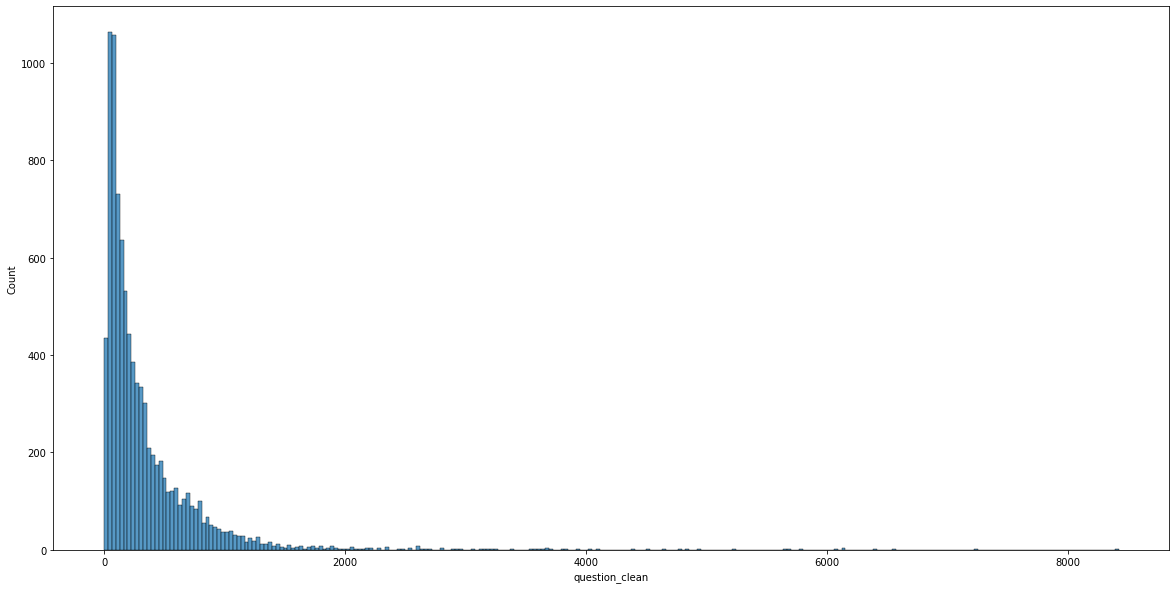

In [13]:
max = bncc_db['question_clean'].str.len().max()
min = bncc_db['question_clean'].str.len().min()
median = bncc_db['question_clean'].str.len().median()
mean = bncc_db['question_clean'].str.len().mean()

print('As questões vão de %d à %d caracteres por questão' % (min, max))
print('O valor mediano e médio de caracteres por questão é de %d e de %d, respectivamente.' %
(median, mean))

fig, ax = plt.subplots(figsize=(20, 10))

sns.histplot(bncc_db['question_clean'].str.len(), ax = ax)

- Verificando Questões vazias

In [30]:
np.where(bncc_db['question_clean'].str.len() == 0)

(array([ 134,  209,  210,  211,  212,  213,  214, 1430, 1441, 1492, 1807,
        1932, 3008, 3126, 3130, 3273, 3294, 3296, 3319, 3467, 3499, 4230,
        4232, 4233, 4234, 4765, 4766, 4767, 4768, 4769, 4770, 4771, 4772,
        4816, 4817, 4827, 4828, 5637, 5639, 5640, 5697, 6277, 6728, 6729,
        6736, 6757, 6918, 6923, 6925, 6927, 6933, 6935, 6937, 7036, 7039,
        7040, 7041, 7042, 7319, 7321, 7326, 7327, 7510, 7511, 7682, 7683,
        7687, 7689, 7691, 7696, 7698, 7709, 7713, 7726, 7727, 7728, 7729,
        7731, 7732, 7734, 7997, 7998, 8002, 8004, 8473, 8474, 8476, 8507,
        8509, 8552, 8553, 8589], dtype=int64),)

### Número de Palavras em cada questão:

O número de palavras vão de 0 à 1261 por questão
O valor mediano e médio de palavras por questão é de 30 e de 52, respectivamente.


<AxesSubplot:xlabel='question_clean', ylabel='Count'>

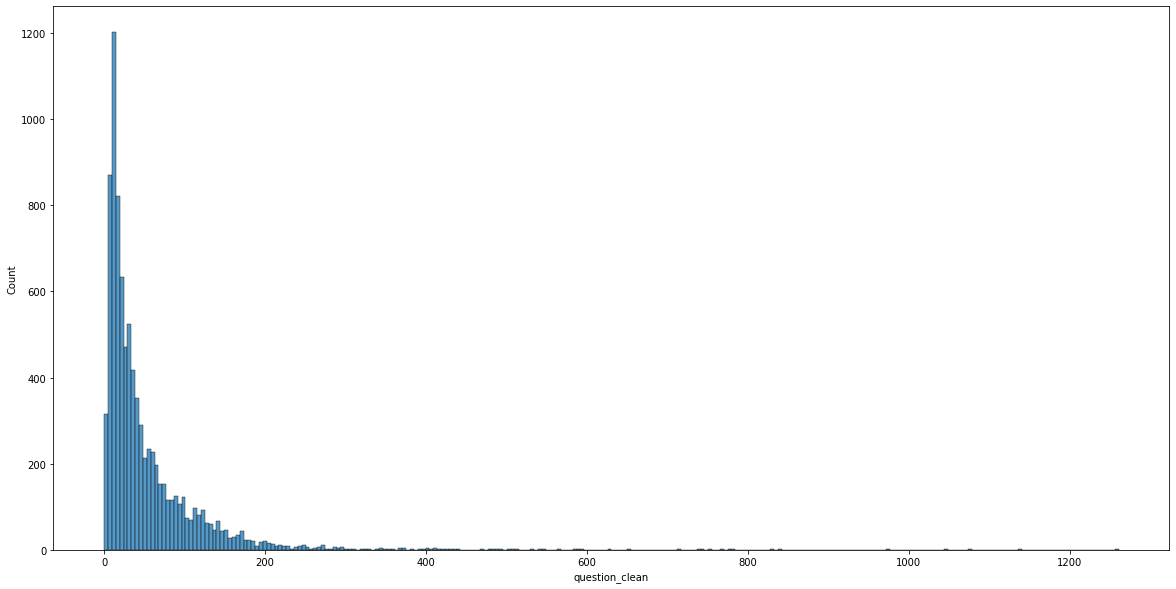

In [103]:
text = bncc_db['question_clean']

max = text.str.split().map(lambda x: len(x)).max()
min = text.str.split().map(lambda x: len(x)).min()
median = text.str.split().map(lambda x: len(x)).median()
mean = text.str.split().map(lambda x: len(x)).mean()

print('O número de palavras vão de %d à %d por questão' % (min, max))
print('O valor mediano e médio de palavras por questão é de %d e de %d, respectivamente.' %
(median, mean))

fig, ax = plt.subplots(figsize=(20, 10))

sns.histplot(text.str.split().map(lambda x: len(x)), ax = ax)



- Média do tamanho das palavras em cada questão

In [31]:
mean_words = bncc_db['question_clean'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))
mean_words

C:\Users\Danilo\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Danilo\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0       5.301587
1       6.000000
2       9.054054
3       5.484848
4       5.857143
          ...   
8903    5.330357
8904    5.421053
8905    5.201389
8906    5.264706
8907    5.477876
Name: question_clean, Length: 8908, dtype: float64

- Valor médio máximo e médio do tamanho de palavras por questão:

In [32]:
max_len_words = bncc_db['question_clean'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).max()
print('O valor máximo do tamanho médio das palavras por questão é de %d (Algo está errado)'%(max_len_words))

mean_len_words = bncc_db['question_clean'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).mean()
print('O valor médio do tamanho de uma palavra por questão é de %d'%(mean_len_words))

O valor máximo do tamanho médio das palavras por questão é de 348 (Algo está errado)
O valor médio do tamanho de uma palavra por questão é de 5


### Possíveis problemas relacionados a palavras compridas;

- Palavras distintas não separadas por espaço
- Ausencia de espaço após finalizar uma frase.
  - Une uma palavra do final de uma frase com a palavra do início de uma nova frase (Acabou.Começou != Acabou. Começou)

Apesar de termos limpados as tag html, a própria estrutura das questões deixam alguns erros. Por ex.:
 - Tópicos enumerados a serem cumpridos na questão estão grudados. ex.:
   - Deveria ser:
    - 1. alternativa
    - 2. alternativa
    - 3. alternativa
    - 4. alternativa
  - Como está:
    - -1. alternativa-2. alternativa- 3. alternativa-4. alternativa

In [127]:
bncc_db['question_clean'][4]


'De cima para baixoNaquele dia o ministro\xa0chegou de mau humor ao seu gabinete e imediatamente mandou chamar o diretor-geral da Secretaria.Este, como se movido fosse por uma pilha elétrica , estava, poucos instantes depois, em presença de Sua Excelência, que o recebeu com duas pedras na mão.– Estou furioso ! — exclamou o conselheiro. — Por sua causa passei por uma vergonha diante de Sua Majestade o Imperador![...]AZEVEDO, Artur de. De cima para baixo. Disponível em: https://novaescola.org.br/conteudo/3167/de-cima-para-baixo . Acesso em: 10 abr. 2021.Classifique as palavras destacadas no texto, de acordo com as regras de formação adequadas, transcrevendo-as \xa0a seguir.1- Masculino\xa02- Feminino3- Singular4- PluralR.:'

C:\Users\Danilo\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Danilo\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<AxesSubplot:xlabel='question_clean', ylabel='Count'>

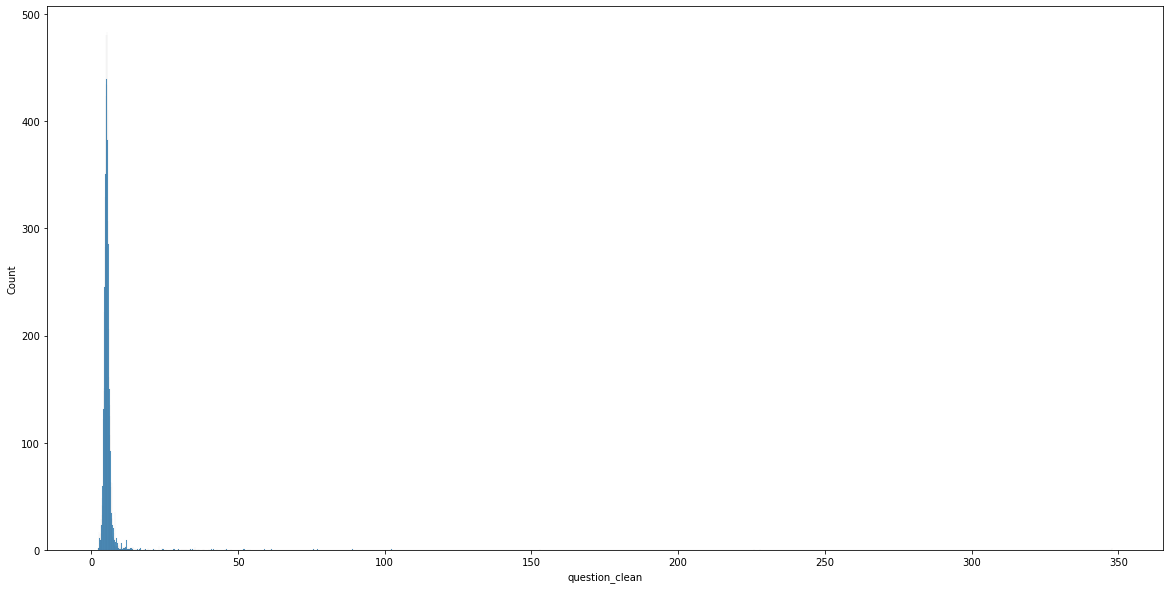

In [104]:
## Verificando o tamanho médio das palavras
fig, ax = plt.subplots(figsize=(20, 10))

sns.histplot(bncc_db['question_clean'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)),
ax = ax)


## Vale notar que existe umas palavras com 40, 60, 80 ... letras, o que é inverossímel

## Verificar 'stopwords' nas questões

In [132]:
import nltk
nltk.download('stopwords')
stop = nltk.corpus.stopwords.words('portuguese')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Danilo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
